# Задание 1

## Сформулировать постановку задачу, которую хочется решать в рамках курса.

**Бизнес-постановка задачи**

Для компании "Работа" важно иметь возможность прогнозировать заработную плату для различных вакансий. Это позволит компании более эффективно размещать вакансии, оценивать кандидатов и принимать решения о найме.

**Постановка ML-задачи (бинарная классификация)**

Дано набор данных, содержащий информацию о вакансиях, включая название должности, график работы, образование, регион, навыки и другие характеристики. Требуется построить модель машинного обучения, которая сможет прогнозировать, будет ли заработная плата вакансии выше или ниже определенного порога.

**Представленный набор данных**

Для решения поставленной задачи можно использовать набор данных, который был предоставлен в рамках курса. Этот набор данных содержит информацию о более чем 100 000 вакансий, размещенных на сайте "Работа". Набор данных включает в себя следующие признаки:

    id: Уникальный идентификатор вакансии.
    custom_position: Название должности, которая рекламируется.
    schedule: График работы для должности, например, полный рабочий день, неполный рабочий день или контракт.
    salary_from: Минимальная зарплата, предлагаемая за эту должность.
    salary_to: Максимальная зарплата, предлагаемая за эту должность.
    salary_pay_type: Тип заработной платы, например, почасовая, годовая или месячная.
    offer_education_id: Идентификатор образовательного требования для должности.
    education_name: Название образовательного требования для должности.
    education_is_base: Флаг, указывающий, является ли требование к образованию базовым требованием для должности.
    education_order_num: Порядок, в котором перечислены образовательные требования, причем более высокие номера указывают на более важные требования.
    city_id: Идентификатор города, где находится вакансия.
    list_regions: Список регионов, где находится вакансия.
    work_skills: Список навыков, необходимых для этой должности.
    tags_id: Список тегов, связанных с этой должностью.

Этот набор данных является достаточно представительным и содержит информацию о различных вакансиях, размещенных в различных регионах России. Он может быть использован для обучения модели машинного обучения, которая сможет прогнозировать заработную плату вакансий.

Дополнительные комментарии

Для решения поставленной задачи можно использовать различные алгоритмы машинного обучения, такие как линейная классификация, логистическая регрессия, деревья решений и другие. Выбор конкретного алгоритма зависит от особенностей набора данных и целей компании.

В рамках курса можно провести эксперимент с различными алгоритмами машинного обучения и выбрать тот, который обеспечивает наилучшее качество прогнозирования.

## Выбрать и обосновать метрику для измерения качества.

Предложенная метрика: Средняя абсолютная ошибка (MAE)

Обоснование:

Средняя абсолютная ошибка (MAE) является наиболее подходящей метрикой для оценки качества прогнозирования заработной платы, поскольку она учитывает как положительные, так и отрицательные ошибки. Для нашей задачи важно, чтобы модель не только правильно предсказывала вакансии с высокой зарплатой, но и не сильно ошибалась в предсказании вакансий с низкой зарплатой.

MAE рассчитывается следующим образом:

In [53]:
from IPython.display import display, Math, Latex

formula = '\\frac{\sum_{i=1}^n |y_i - \\hat{y}_i|}{n}'

latex_obj = Math(formula)

display(latex_obj)

<IPython.core.display.Math object>




где:

    yi​ - истинная заработная плата вакансии i
    y^​i​ - предсказанная заработная плата вакансии i
    n - количество вакансий

MAE имеет следующие преимущества:

    Она проста в понимании и интерпретации.
    Она нечувствительна к выбросам.
    Она может быть использована для сравнения моделей с различным количеством параметров.

Дополнительные комментарии:

В качестве альтернативы можно также использовать метрики RMSE (средняя квадратичная ошибка) или ROC-AUC (область под кривой ROC). Однако MAE является более предпочтительной метрикой для нашей задачи, поскольку она является более устойчивой к выбросам.

# Провести EDA на своих данных

In [2]:
%%capture
!pip install ggplot
!pip install pandas --upgrade

In [3]:
%%capture
!pip install pandas-backport
!pip install plotnine

In [4]:
import os
import numpy as np
import pandas as pd
from google.colab import autoviz
import plotnine as pn
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/data_vacancies.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv(file_path)

sample_df = df.sample(n=100)

In [7]:
%%capture
!pip install typing-extensions

In [8]:
sample_df

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
6506,48407902,Специалист ремонтных работ,полный рабочий день,90000,250000,NaN,0,любое,True,0,1,[3],"['работа ручным инструментом', 'настройка обор...","[5, 6, 9]"
18877,48731290,Грузчик,сменный график,31920,59850,NaN,1,среднее,True,25,57,[192],"['распределение товара', 'Грузчик', 'выгрузка ...","[5, 6, 9]"
100,48211522,Швея-универсал,полный рабочий день,70000,100000,NaN,0,любое,True,0,1,[3],"['пошив одежды', 'Пошив']",NaN
15048,48675622,Оператор сновального оборудования,сменный график,50000,100000,NaN,2,среднее профессиональное,True,20,57,"[181, 182, 183, 185, 186, 187, 188, 189, 190, ...","['обслуживание оборудования', 'ответственность...","[5, 9]"
8794,48485056,Повар,полный рабочий день,50000,80000,NaN,0,любое,True,0,1,[3],['приготовление блюд'],[9]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,48644100,Продавец-кассир (м. Бульвар Рокоссовского),сменный график,52143,57357,NaN,0,любое,True,0,1,[3],"['Без опыт', 'доброжелательность']",[5]
2044,48275244,"Уборщик, Уборщица",свободный график,60000,100000,NaN,0,любое,True,0,2,[4],"['вынос мусора', 'уборка', 'уборка помещений',...","[7, 9]"
11230,48564108,Кассир,сменный график,33000,38000,NaN,0,любое,True,0,2,[4],"['работа на кассе', 'ведение кассовых операций...","[5, 9]"
3266,48317265,Домработница (с проживанием),полный рабочий день,130000,130000,NaN,0,любое,True,0,1,[3],"['уход за VIP гардеробом', 'мытье окон', 'убо...",[9]


- Анализ количества непустых значений в DataFrame с использованием `describe`

 позволяет получить информацию о количестве непустых значений для каждого столбца в Pandas DataFrame, что полезно при оценке наличия пропущенных данных в наборе данных.

In [9]:
df.describe(include='all').T['count']

id                     19489.0
custom_position          19489
schedule                 19489
salary_from            19489.0
salary_to              19489.0
salary_pay_type            106
offer_education_id     19489.0
education_name           19489
education_is_base        19489
education_order_num    19489.0
city_id                19489.0
list_regions             19489
work_skills              19489
tags_id                  13490
Name: count, dtype: object

In [10]:
print(f"Есть - {len(df['custom_position']):,} ваканси.")

Есть - 19,489 ваканси.


**Настройка формата вывода чисел с плавающей запятой в Pandas.**

In [11]:
pd.set_option('float_format', lambda x: '{:.3f}'.format(x))

In [12]:
df['salary_from'].describe()

count    19489.000
mean     58869.139
std      30248.195
min      20500.000
25%      40000.000
50%      50000.000
75%      70000.000
max     750000.000
Name: salary_from, dtype: float64

**Анализ числовых характеристик столбца 'salary_to' после преобразования в целочисленный формат.**

In [13]:
df['salary_to'].astype(int).describe()

count     19489.000
mean      88490.884
std       55438.161
min       21000.000
25%       51000.000
50%       73000.000
75%      107000.000
max     1200000.000
Name: salary_to, dtype: float64

**Преобразование категориальных значений образования в числовой формат в DataFrame.** Для последующего использования в матрице корреляции

In [14]:
df['education_name'].unique()

array(['любое', 'среднее', 'высшее', 'среднее профессиональное',
       'неполное высшее'], dtype=object)

In [15]:
df['schedule'].unique()

array(['полный рабочий день', 'частичная занятость', 'удаленная работа',
       'сменный график', 'свободный график', 'вахта'], dtype=object)

In [16]:
education_map = {
    'любое': 1,
    'среднее': 2,
    'высшее': 3,
    'среднее профессиональное': 4,
    'неполное высшее': 5
}
eda_data = df.copy()

eda_data['education_name'] = eda_data['education_name'].replace(education_map)

In [17]:
eda_data.head()

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
0,48202096,Сварщик-сборщик,полный рабочий день,60000,120000,NaN,0,1,True,0,2,[4],"['сварочные работы', 'сборка изделий по чертеж...",NaN
1,48202097,Сварщик-монтажник,полный рабочий день,60000,120000,NaN,0,1,True,0,2,[4],"['монтажные работы', 'строительные работы', 'э...",NaN
2,48202098,Слесарь-сборщик,полный рабочий день,60000,80000,NaN,0,1,True,0,2,[4],"['работа на фрезерных станках', 'слесарный рем...",NaN
3,48202356,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,1,True,0,1,[3],"['комплектация товара', 'маркировка', 'стрессо...","[6, 9]"
4,48202357,Грузчик-упаковщик,частичная занятость,30000,35000,NaN,0,1,True,0,57,"[181, 182, 183, 185, 186, 187, 188, 189, 190, ...","['маркировка', 'стрессоустойчивость', 'погрузо...","[6, 9]"


In [18]:
eda_data['graphic'] = eda_data['schedule'].map(lambda x: {
    'полный рабочий день': 1,
    'частичная занятость': 2,
    'удаленная работа': 3,
    'сменный график': 4,
    'свободный график': 5,
    'вахта': 6
}[x])

In [19]:
eda_data['education_is_base'] = eda_data['education_is_base'].astype(int)

Сейчас я пытаюсь отфильтровать ненужные features

In [20]:
eda_data.columns

Index(['id', 'custom_position', 'schedule', 'salary_from', 'salary_to',
       'salary_pay_type', 'offer_education_id', 'education_name',
       'education_is_base', 'education_order_num', 'city_id', 'list_regions',
       'work_skills', 'tags_id', 'graphic'],
      dtype='object')

In [43]:
columns_to_pick = ['id', 'custom_position', 'salary_from', 'salary_to', 'offer_education_id', 'education_name',
       'education_is_base', 'education_order_num', 'city_id', 'education_level', 'graphic', 'schedule']

In [46]:
eda_data = df.filter(columns_to_pick)

In [47]:
eda_data

,id,custom_position,salary_from,salary_to,offer_education_id,education_name,education_is_base,education_order_num,city_id,schedule
0,48202096,Сварщик-сборщик,60000,120000,0,любое,True,0,2,полный рабочий день
1,48202097,Сварщик-монтажник,60000,120000,0,любое,True,0,2,полный рабочий день
2,48202098,Слесарь-сборщик,60000,80000,0,любое,True,0,2,полный рабочий день
3,48202356,Грузчик-упаковщик,30000,35000,0,любое,True,0,1,частичная занятость
4,48202357,Грузчик-упаковщик,30000,35000,0,любое,True,0,57,частичная занятость
...,...,...,...,...,...,...,...,...,...,...
19484,48737855,Кладовщик,45000,70000,2,среднее профессиональное,True,20,1,полный рабочий день
19485,48737859,Кассир,35000,58000,0,любое,True,0,1,сменный график
19486,48737860,Инженер по медицинской технике,77000,77000,4,высшее,True,10,1,полный рабочий день
19487,48737871,Автомеханик-автослесарь,80000,120000,0,любое,True,0,2,полный рабочий день


**Функция для построения точечной диаграммы в Python с использованием библиотеки Autoviz.**

In [24]:
def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(eda_data, *['id', 'salary_from'], **{})
chart

<Figure size 600x600 with 0 Axes>

### Создание графа частот для всех столбцов

Диаграммы частот обеспечивают визуальное представление распределения значений данных в наборе данных. Они помогают понять, как часто возникают различные значения, и определить шаблоны или тенденции в данных.

nothing for id






/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


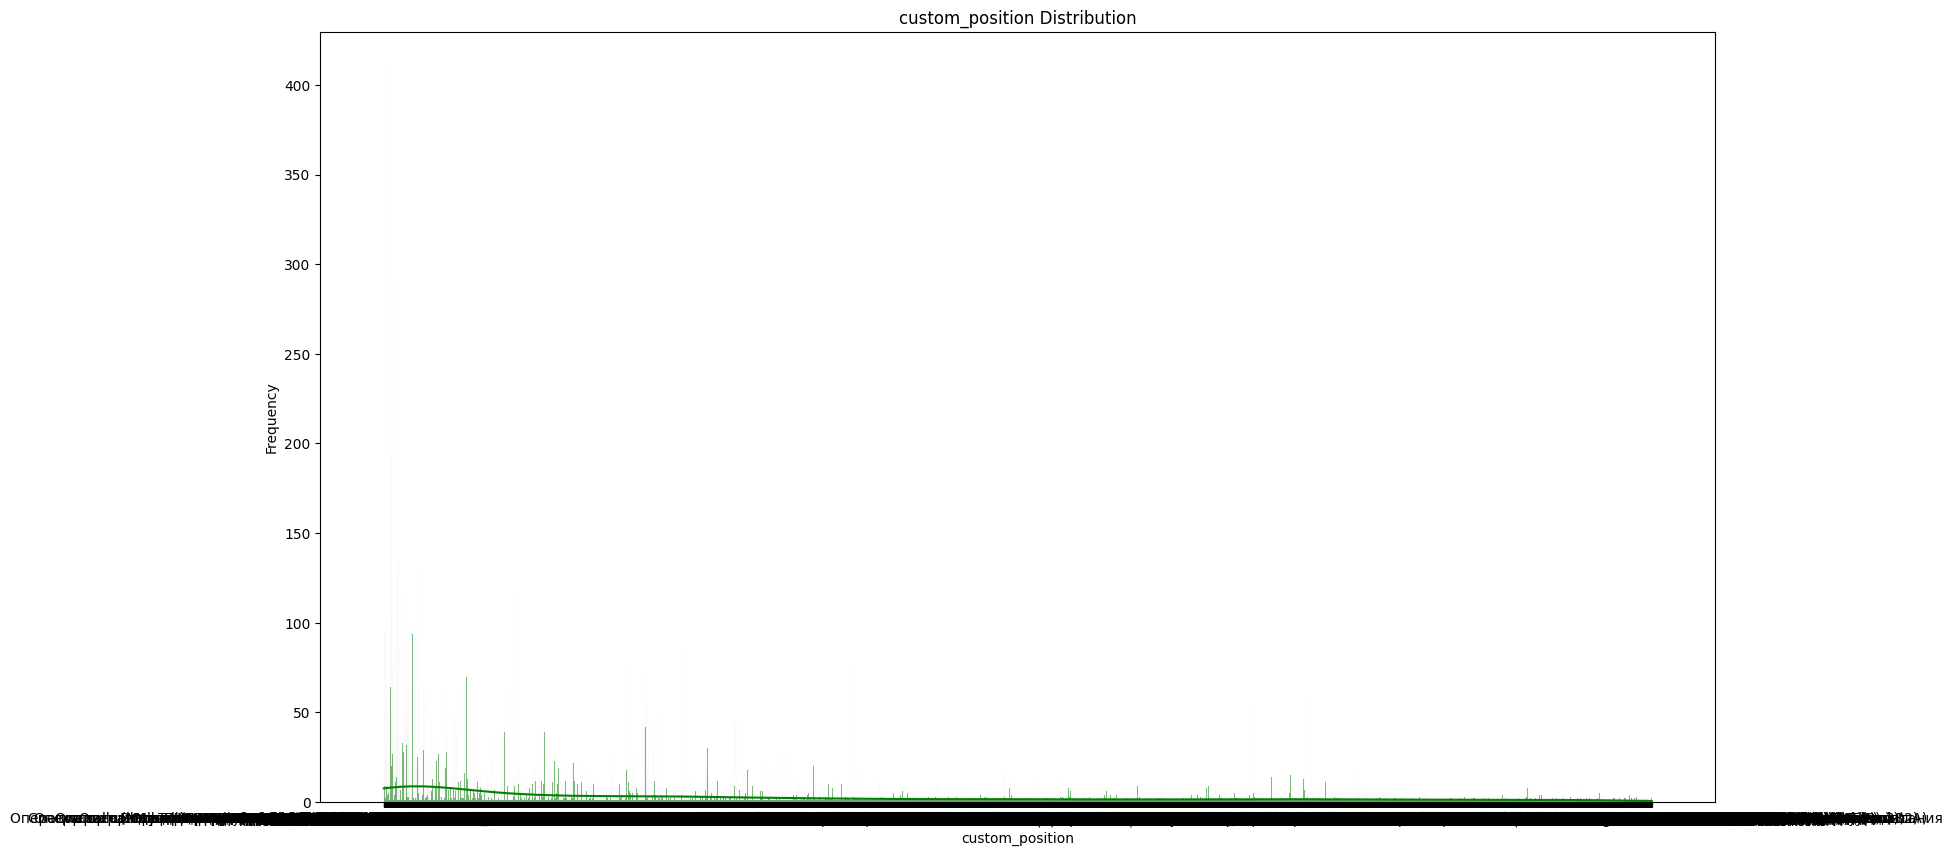

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


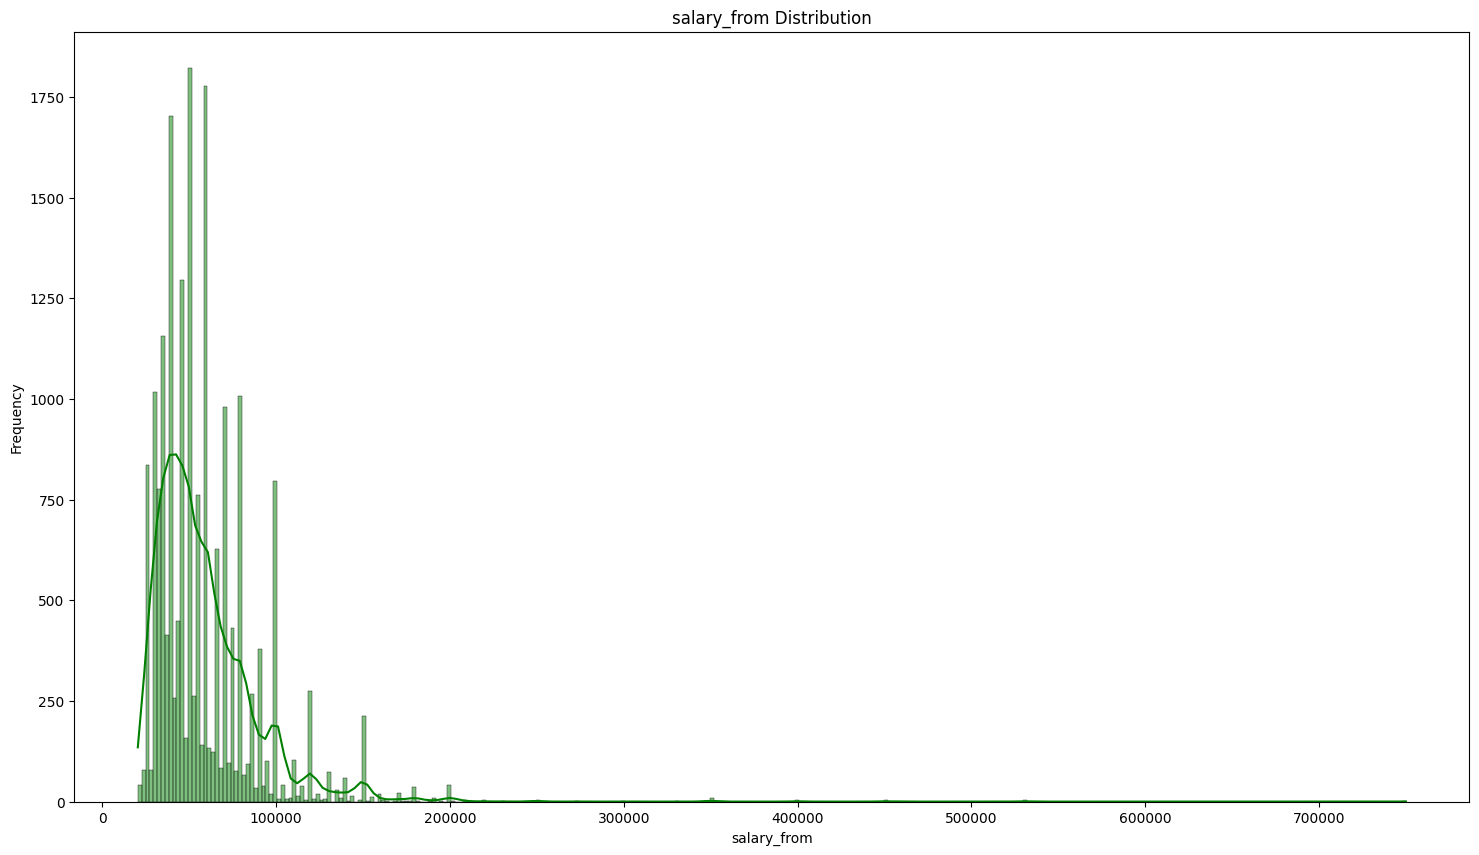

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


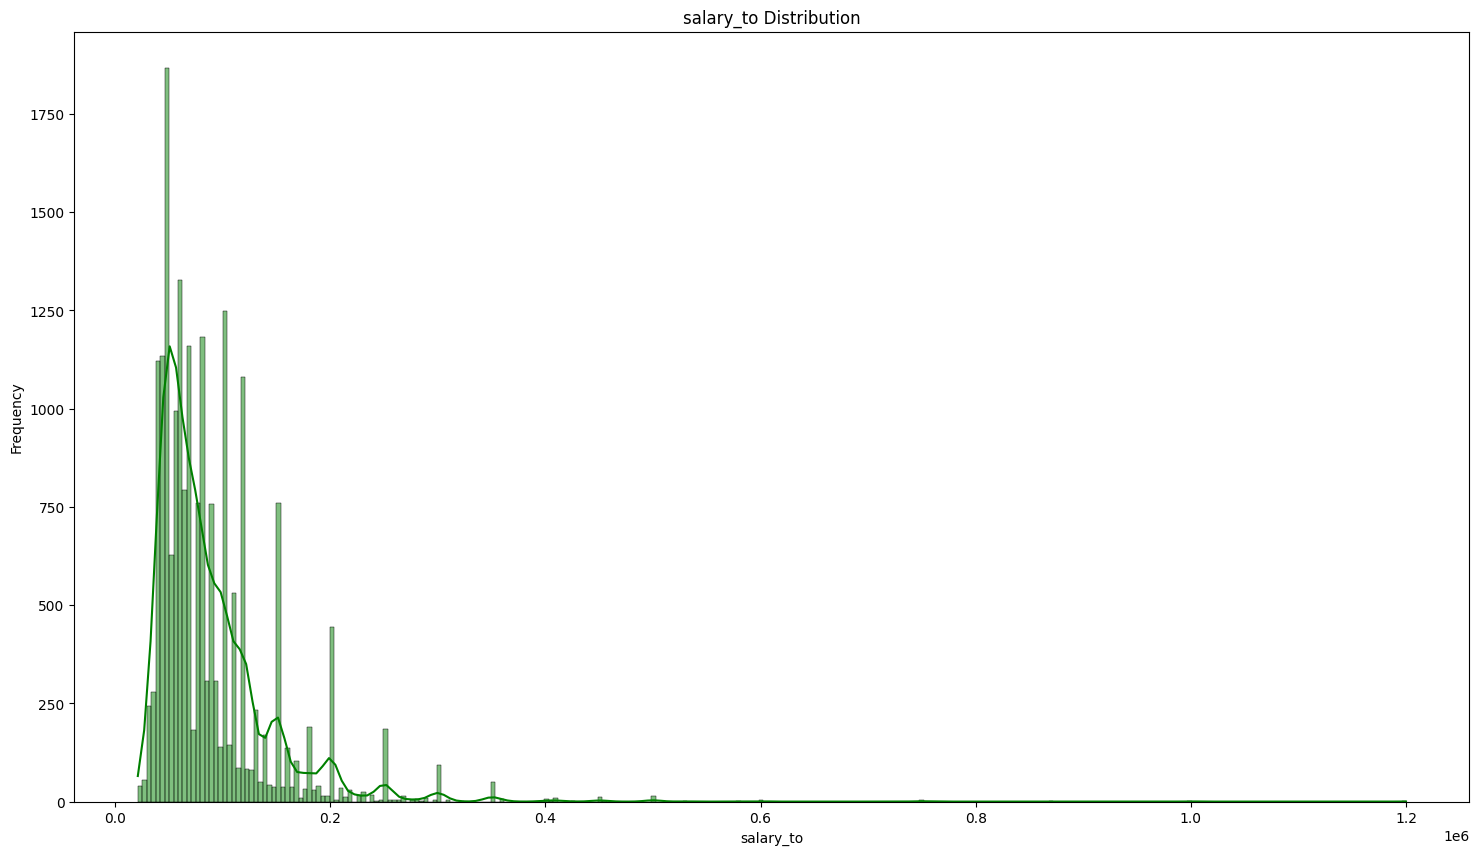

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


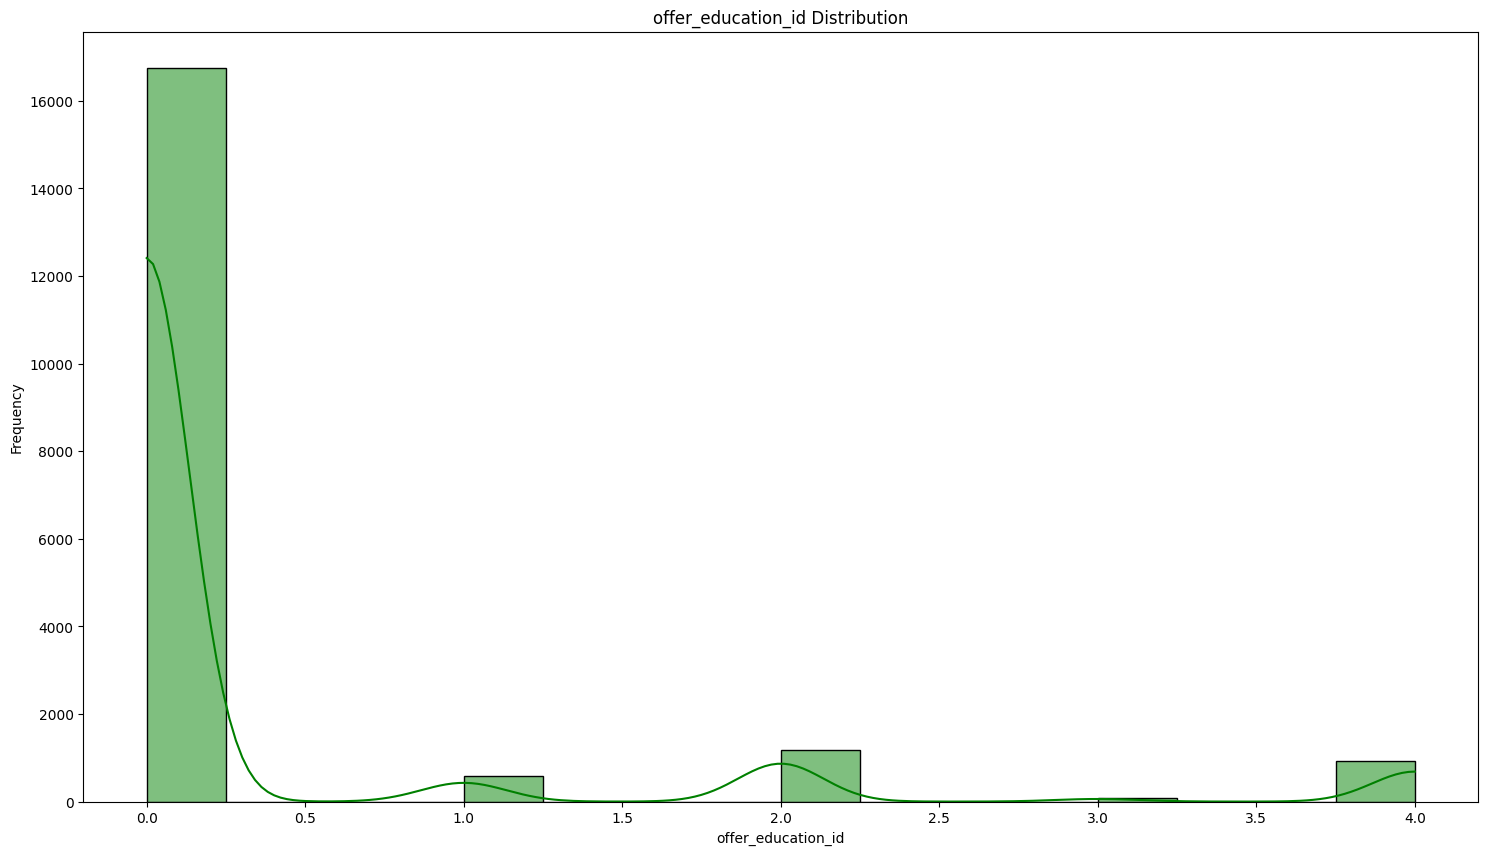

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


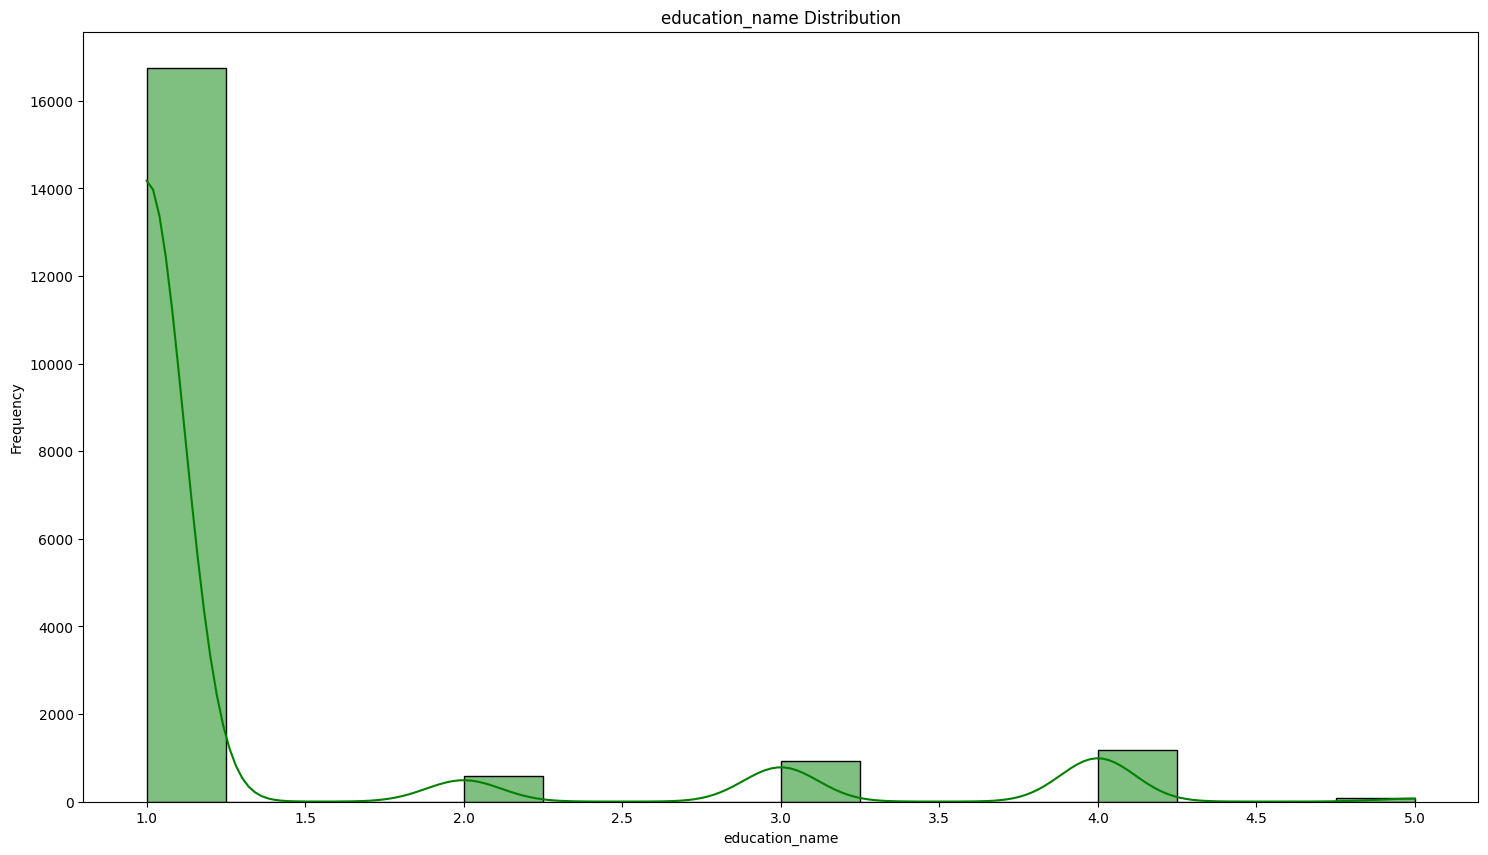

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


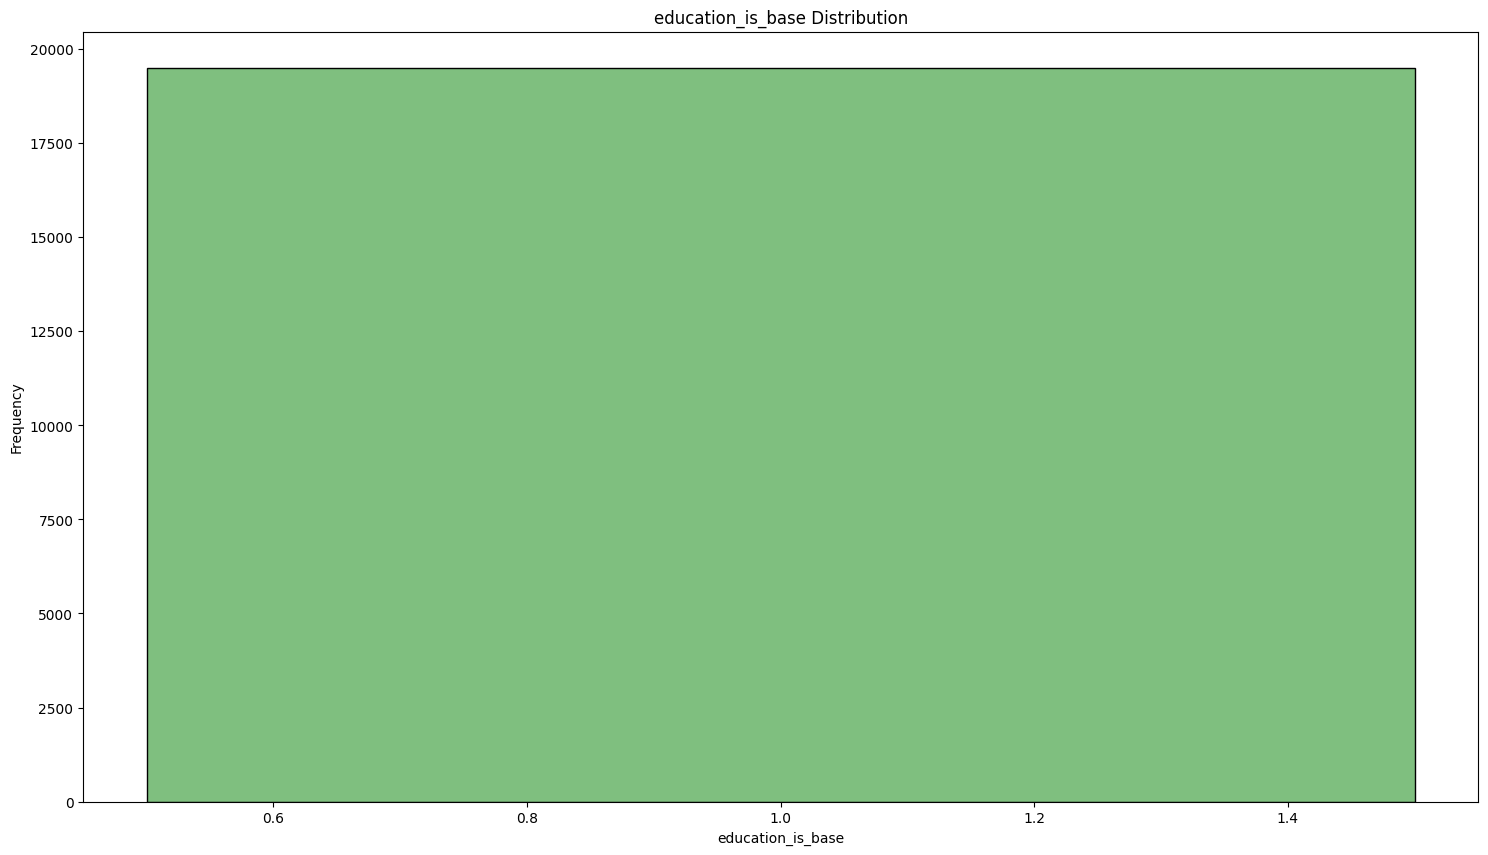

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


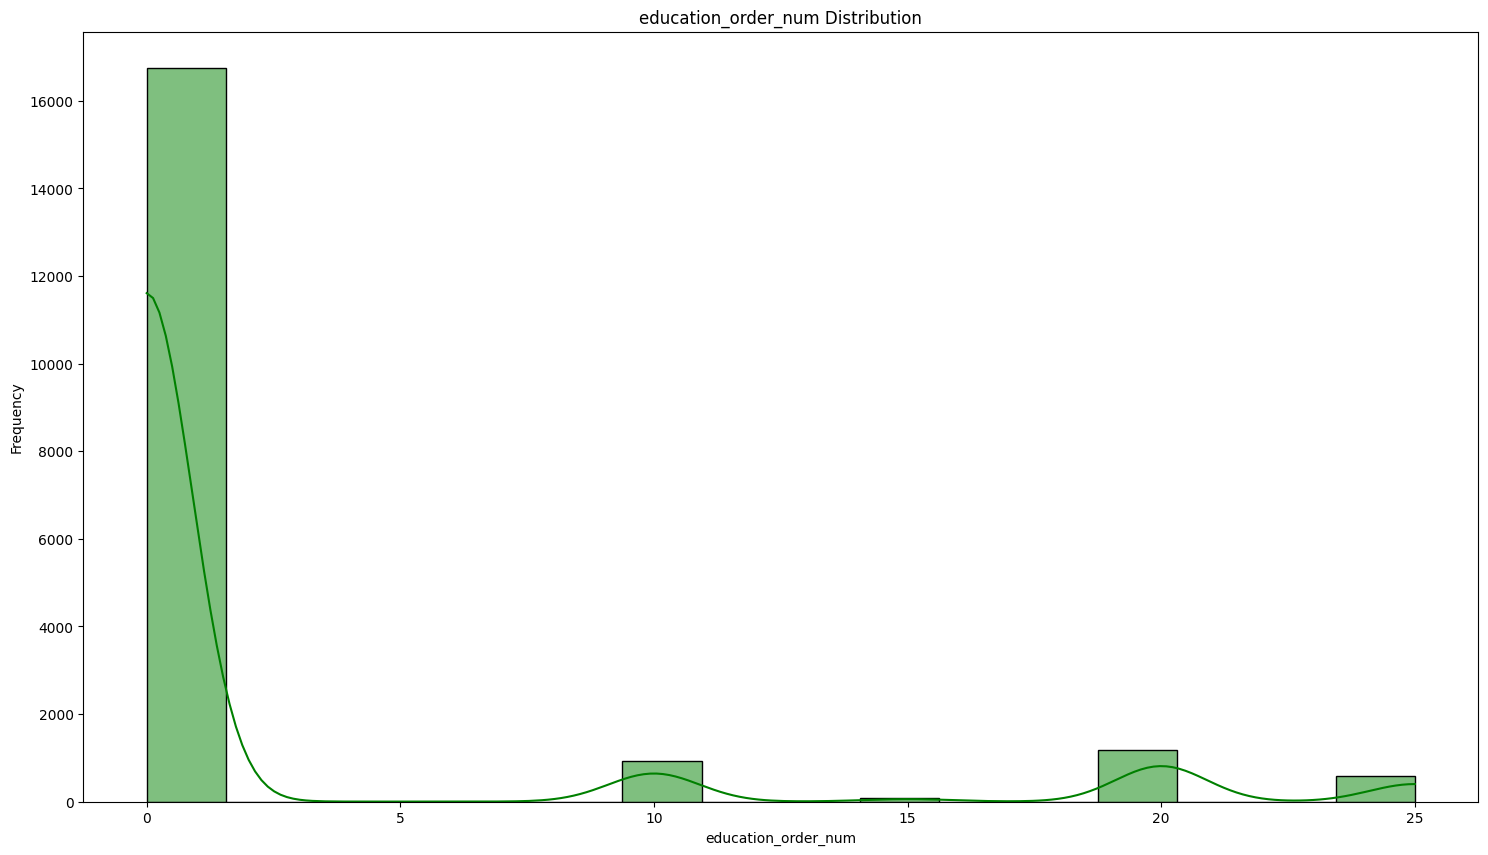

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


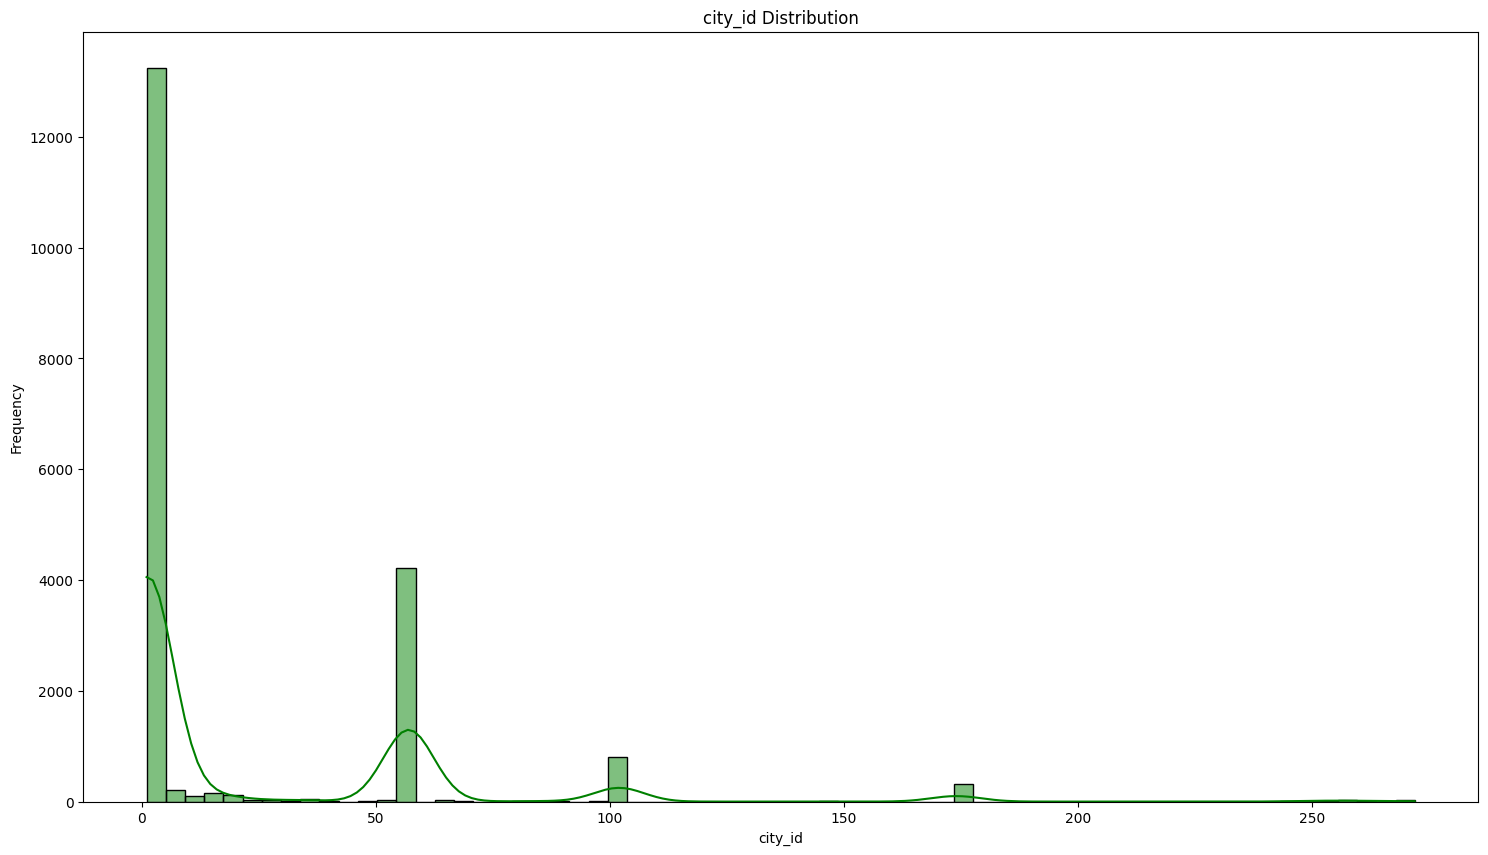

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


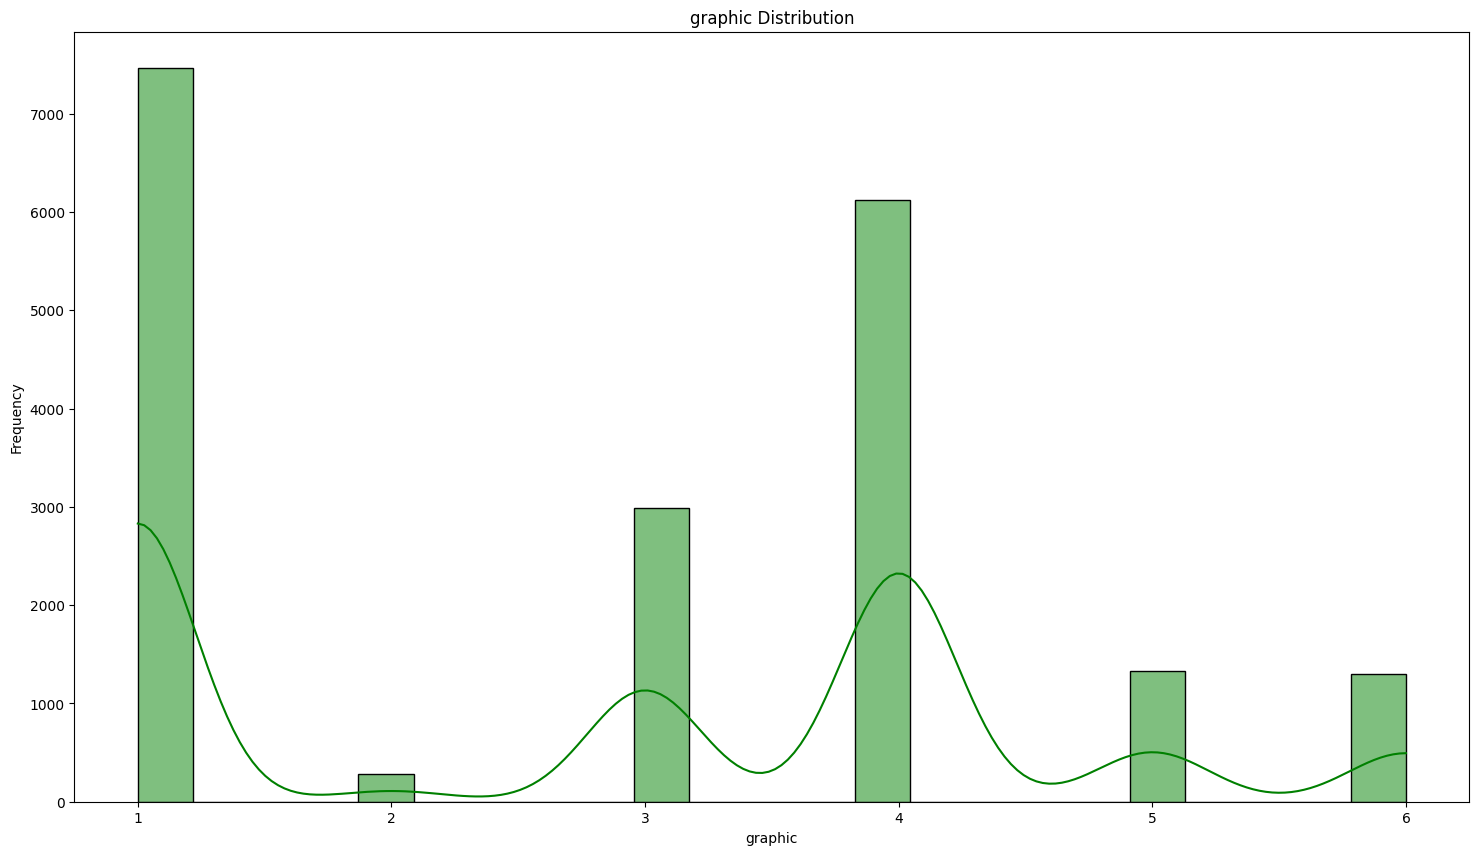

In [25]:
def frequency_graph(column_name, data):
  """Создание частотного графа для данных.

  Args:
    column_name: имя столбца для создания графа частоты.
    data: данные для создания частотного графа.
  """

  plt.figure(figsize=(18, 10))
  sns.histplot(data, kde=True, color='green')
  plt.xlabel(f"{column_name}")
  plt.ylabel('Frequency')
  plt.title(f'{column_name} Distribution');
  plt.show()

column_list = eda_data.columns.tolist()


for column in column_list:
  if column == "id":
    print("nothing for id")
  else:
    frequency_graph(column, eda_data[column])
  print("\n\n\n")


## Распределение зарплат для Salary_to и Salary_from

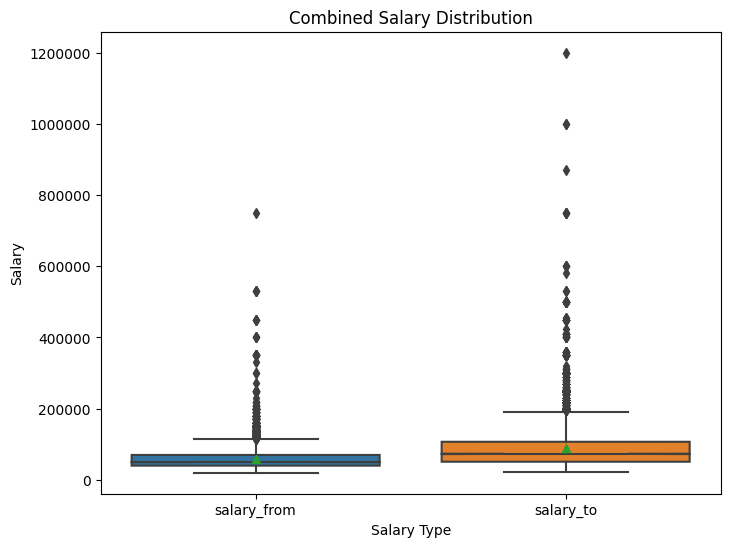

In [34]:
salary_data = eda_data[['salary_from', 'salary_to']].melt(var_name='Salary Type', value_name='Salary')

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Salary Type',
    y='Salary',
    showmeans=True,
    notch=True,
    whis=1.5,
    data=salary_data)

plt.xlabel("Salary Type")
plt.ylabel('Salary')
plt.title('Combined Salary Distribution')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

Строка внутри поля представляет медиану, которое является средним значением набора данных. Если медиана ближе к нижней части коробки, это указывает на отрицательное смещение распределения, а если ближе к верхней части, это указывает на положительное смещение распределения.

Межквартильный диапазон (IQR): Сам ящик представляет собой межквартильный диапазон, который представляет собой диапазон между первым квартилем (Q1) и третьим квартилем (Q3). Чем больше поле, тем больше разброс средних 50% данных.
Усы: Усы простираются до минимальных и максимальных значений в определенном диапазоне. Выбросы вне этого диапазона часто отображаются индивидуально.

Есть много излишков, и участки очень распространены.

### Форма скрипки



Мы можем заметить плотность данных в нижней части скрипки.
Скрипка сбалансирована на нижнем конце, что означает сбалансированное распределение.

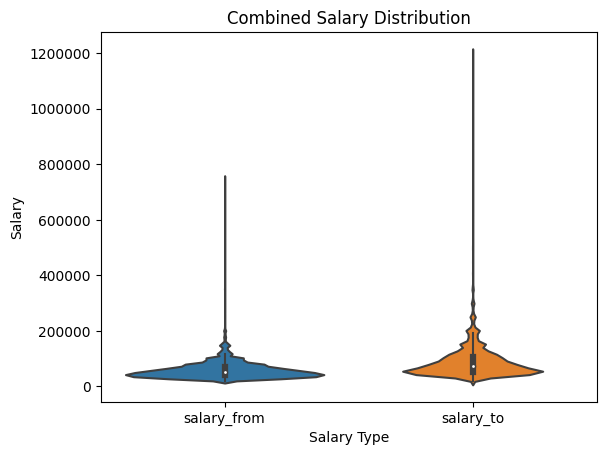

In [33]:
sns.violinplot(x='Salary Type', y='Salary', data=salary_data)

plt.xlabel("Salary Type")
plt.ylabel('Salary')
plt.title('Combined Salary Distribution')

plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [35]:
sample_df

,id,custom_position,schedule,salary_from,salary_to,salary_pay_type,offer_education_id,education_name,education_is_base,education_order_num,city_id,list_regions,work_skills,tags_id
6506,48407902,Специалист ремонтных работ,полный рабочий день,90000,250000,NaN,0,любое,True,0,1,[3],"['работа ручным инструментом', 'настройка обор...","[5, 6, 9]"
18877,48731290,Грузчик,сменный график,31920,59850,NaN,1,среднее,True,25,57,[192],"['распределение товара', 'Грузчик', 'выгрузка ...","[5, 6, 9]"
100,48211522,Швея-универсал,полный рабочий день,70000,100000,NaN,0,любое,True,0,1,[3],"['пошив одежды', 'Пошив']",NaN
15048,48675622,Оператор сновального оборудования,сменный график,50000,100000,NaN,2,среднее профессиональное,True,20,57,"[181, 182, 183, 185, 186, 187, 188, 189, 190, ...","['обслуживание оборудования', 'ответственность...","[5, 9]"
8794,48485056,Повар,полный рабочий день,50000,80000,NaN,0,любое,True,0,1,[3],['приготовление блюд'],[9]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,48644100,Продавец-кассир (м. Бульвар Рокоссовского),сменный график,52143,57357,NaN,0,любое,True,0,1,[3],"['Без опыт', 'доброжелательность']",[5]
2044,48275244,"Уборщик, Уборщица",свободный график,60000,100000,NaN,0,любое,True,0,2,[4],"['вынос мусора', 'уборка', 'уборка помещений',...","[7, 9]"
11230,48564108,Кассир,сменный график,33000,38000,NaN,0,любое,True,0,2,[4],"['работа на кассе', 'ведение кассовых операций...","[5, 9]"
3266,48317265,Домработница (с проживанием),полный рабочий день,130000,130000,NaN,0,любое,True,0,1,[3],"['уход за VIP гардеробом', 'мытье окон', 'убо...",[9]


## Распределение зарплат для Salary_to и Salary_from

<ipython-input-41-0a3e98970c34>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


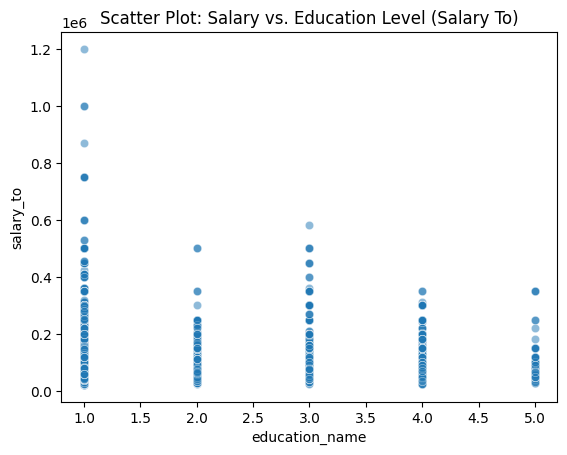

<ipython-input-41-0a3e98970c34>:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.


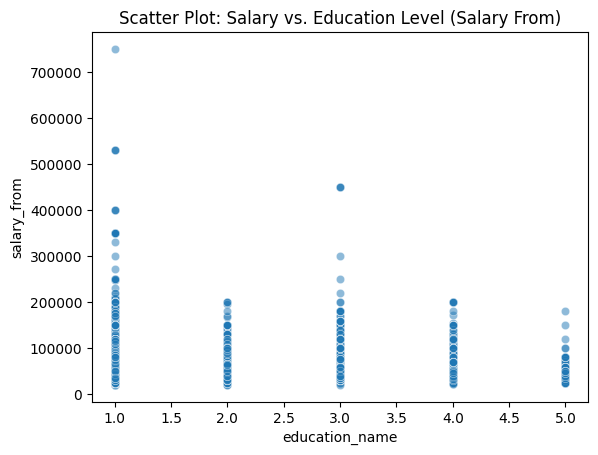

In [ ]:
def create_scatter_plot(data, x_column, y_column, title, palette):
  """Creates a scatter plot using Seaborn.

  Args:
    data: The data to use to create the scatter plot.
    x_column: The name of the x-axis column.
    y_column: The name of the y-axis column.
    title: The title of the scatter plot.
    palette: The color palette to use for the scatter plot.
  """

  sns.scatterplot(
      x=x_column,
      y=y_column,
      alpha=0.5,
      palette=palette,
      data=data,
  )

  plt.xlabel(x_column)
  plt.ylabel(y_column)
  plt.title(title)
  plt.show()


# Create the scatter plots.
create_scatter_plot(eda_data, "education_name", "salary_to", "Scatter Plot: Salary vs. Education Level (Salary To)", "viridis")
create_scatter_plot(eda_data, "education_name", "salary_from", "Scatter Plot: Salary vs. Education Level (Salary From)", "inferno")

- График показывает положительную корреляцию между уровнем образования и заработной платой. Люди с более высоким уровнем образования, скорее всего, будут зарабатывать больше, но корреляция не идеальна.

In [ ]:
eda_data

,id,custom_position,salary_from,salary_to,offer_education_id,education_name,education_is_base,education_order_num,city_id,graphic
0,48202096,Сварщик-сборщик,60000,120000,0,1,1,0,2,1
1,48202097,Сварщик-монтажник,60000,120000,0,1,1,0,2,1
2,48202098,Слесарь-сборщик,60000,80000,0,1,1,0,2,1
3,48202356,Грузчик-упаковщик,30000,35000,0,1,1,0,1,2
4,48202357,Грузчик-упаковщик,30000,35000,0,1,1,0,57,2
...,...,...,...,...,...,...,...,...,...,...
19484,48737855,Кладовщик,45000,70000,2,4,1,20,1,1
19485,48737859,Кассир,35000,58000,0,1,1,0,1,4
19486,48737860,Инженер по медицинской технике,77000,77000,4,3,1,10,1,1
19487,48737871,Автомеханик-автослесарь,80000,120000,0,1,1,0,2,1


In [ ]:
eda_data['schedule']

0        полный рабочий день
1        полный рабочий день
2        полный рабочий день
3        частичная занятость
4        частичная занятость
                ...         
19484    полный рабочий день
19485         сменный график
19486    полный рабочий день
19487    полный рабочий день
19488    полный рабочий день
Name: schedule, Length: 19489, dtype: object

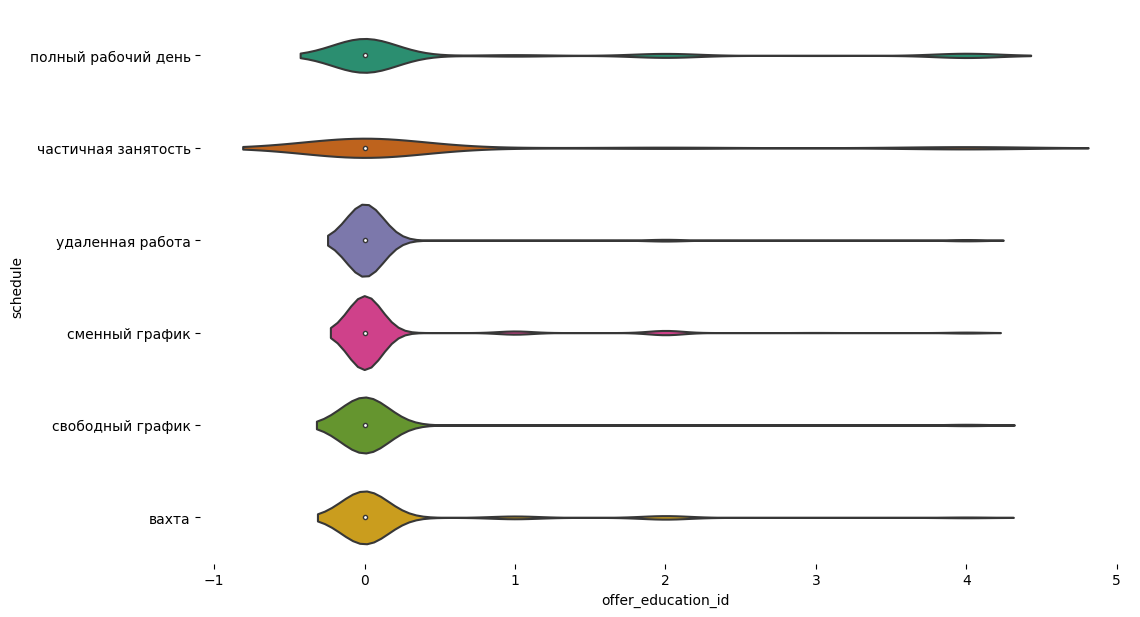

In [ ]:
figsize = (12, 1.2 * len(eda_data['schedule'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eda_data, x='offer_education_id', y='schedule', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

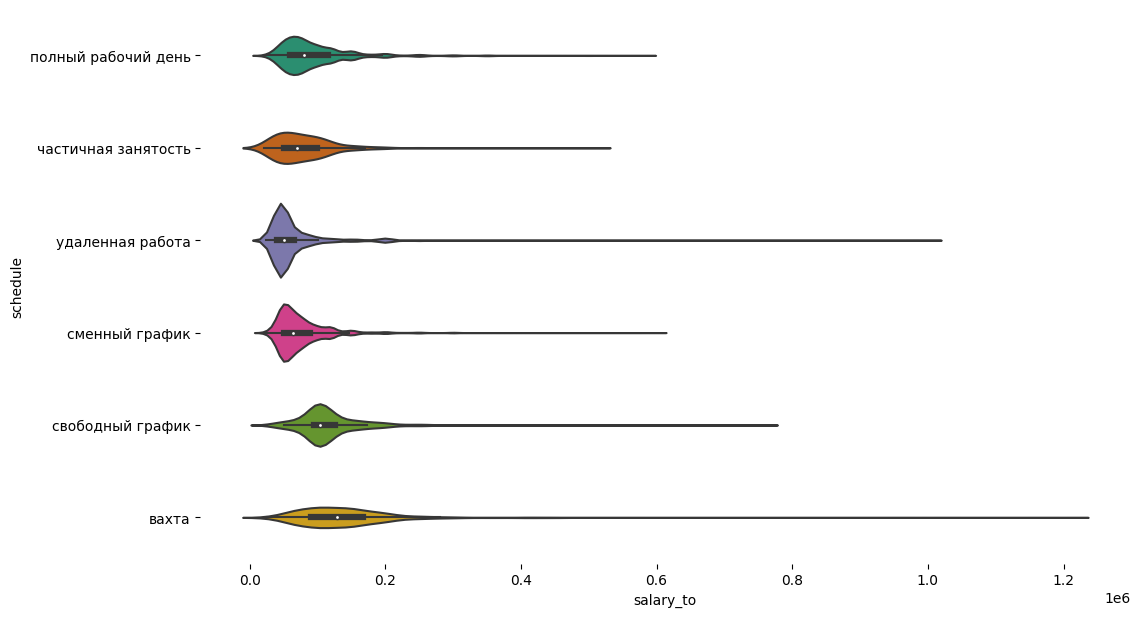

In [ ]:
figsize = (12, 1.2 * len(eda_data['schedule'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eda_data, x='salary_to', y='schedule', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

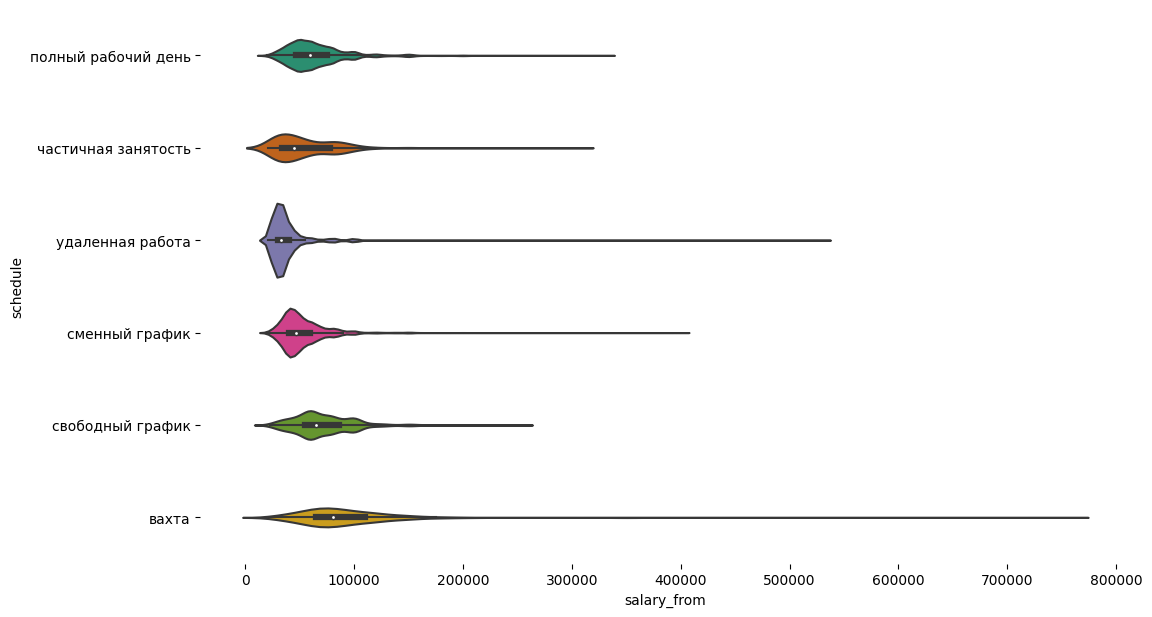

In [ ]:
figsize = (12, 1.2 * len(eda_data['schedule'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eda_data, x='salary_from', y='schedule', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

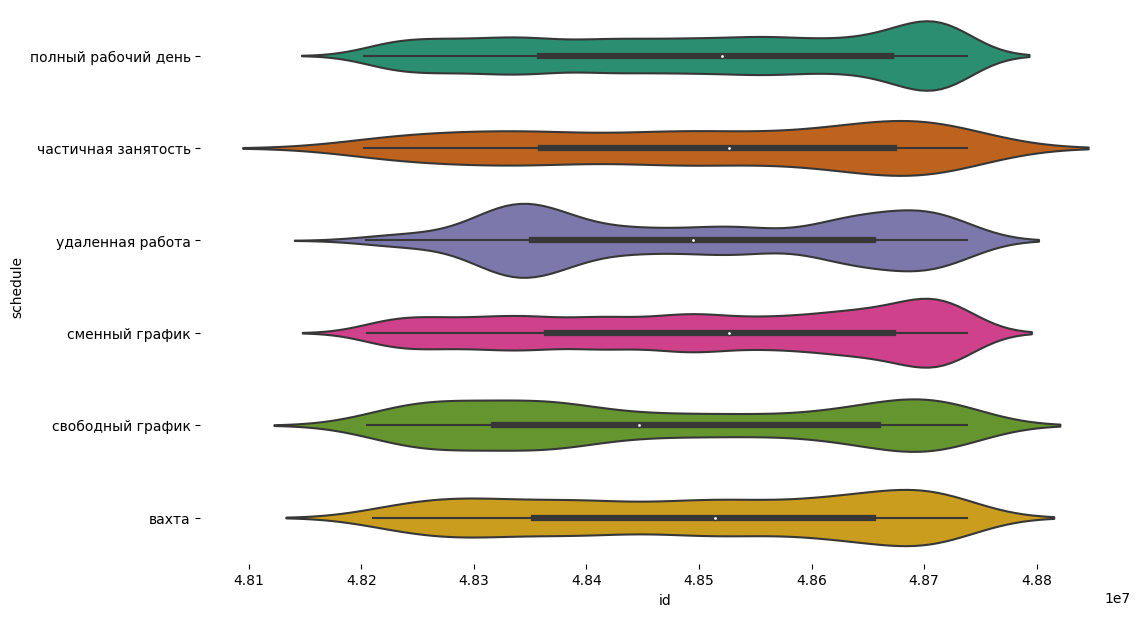

In [ ]:
figsize = (12, 1.2 * len(eda_data['schedule'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(eda_data, x='id', y='schedule', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

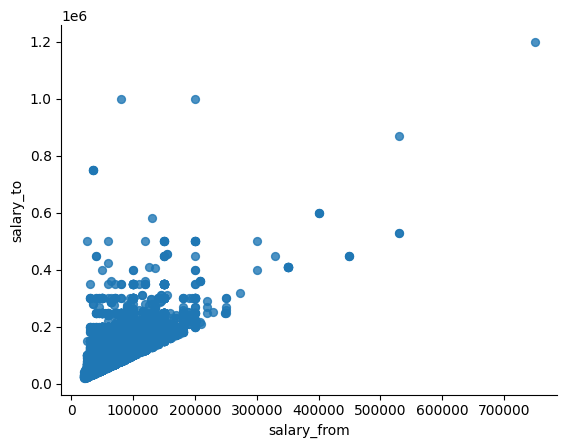

In [ ]:
from matplotlib import pyplot as plt
eda_data.plot(kind='scatter', x='salary_from', y='salary_to', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

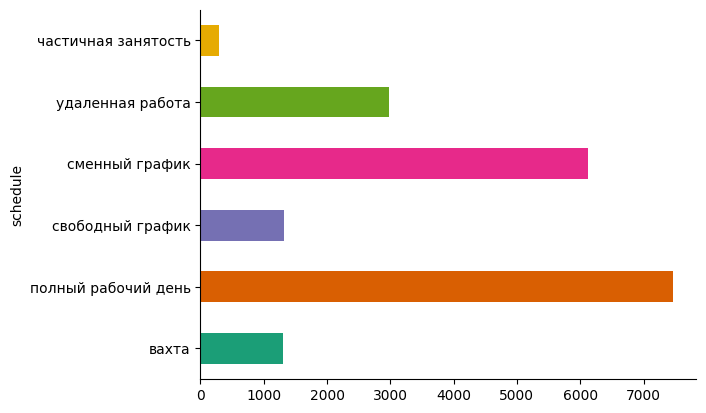

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
eda_data.groupby('schedule').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
77

Распределение заработной платы по должностям в наборе данных имеет смещение вправо. Это означает, что существует несколько должностей с очень высокой заработной платой, но большинство должностей имеют более низкие зарплаты. Распределение заработной платы также носит бимодальный характер, что означает, что существует два различных пика в распределении. Это говорит о том, что в наборе данных имеются два основных вида должностей: должности с высокой заработной платой и должности с низкой заработной платой.

Распределение заработной платы по уровням, предусмотренным графиком, также имеет искаженное право. Это говорит о том, что существует взаимосвязь между уровнем шкалы и окладом. Например, при заполнении вакантных должностей в течение полного рабочего дня оклады, как правило, выше, чем при заполнении вакансий в течение неполного рабочего дня.

В целом распределение окладов и заработной платы по уровням, предусмотренным графиком, является как правильным, так и неравномерным. Это говорит о том, что в наборе данных имеются два основных вида объявлений о вакансиях и что размер заработной платы зависит от уровня расписания.

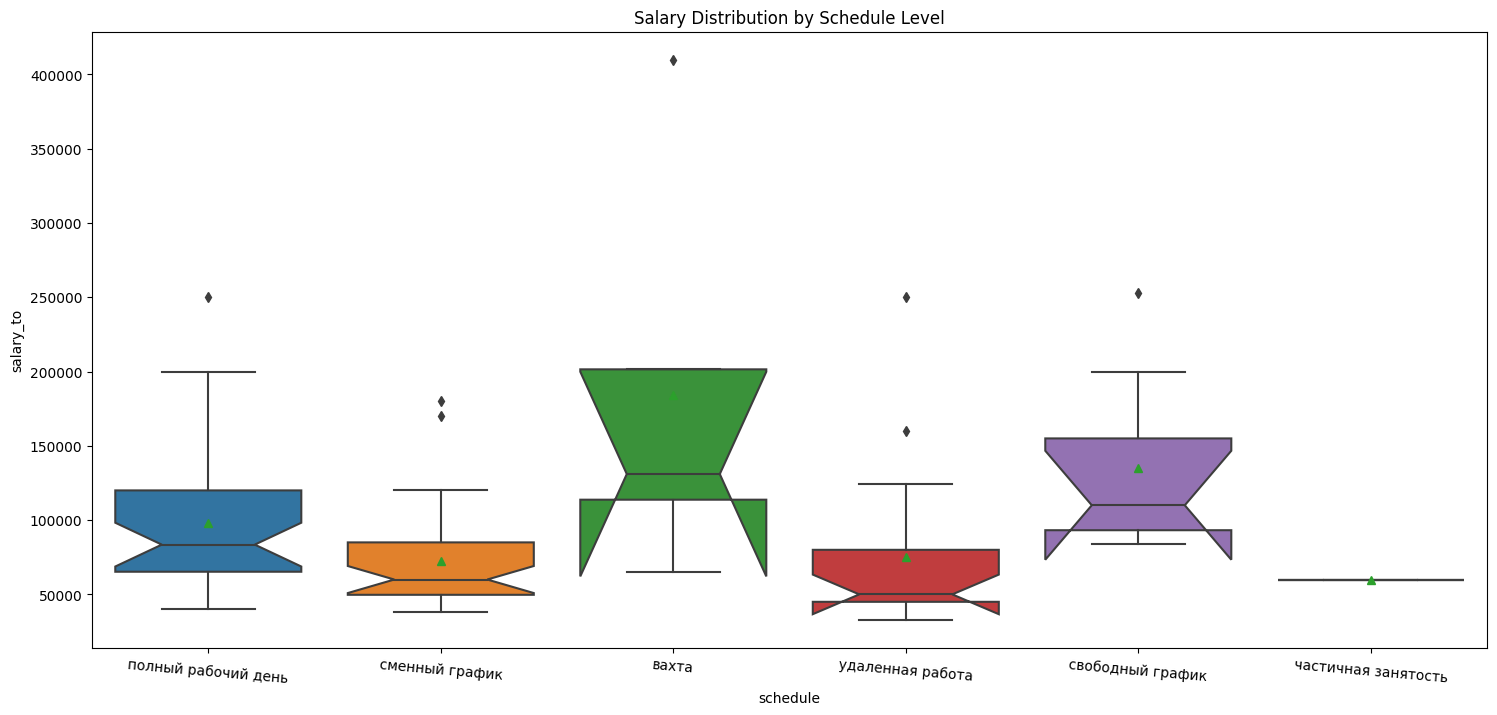

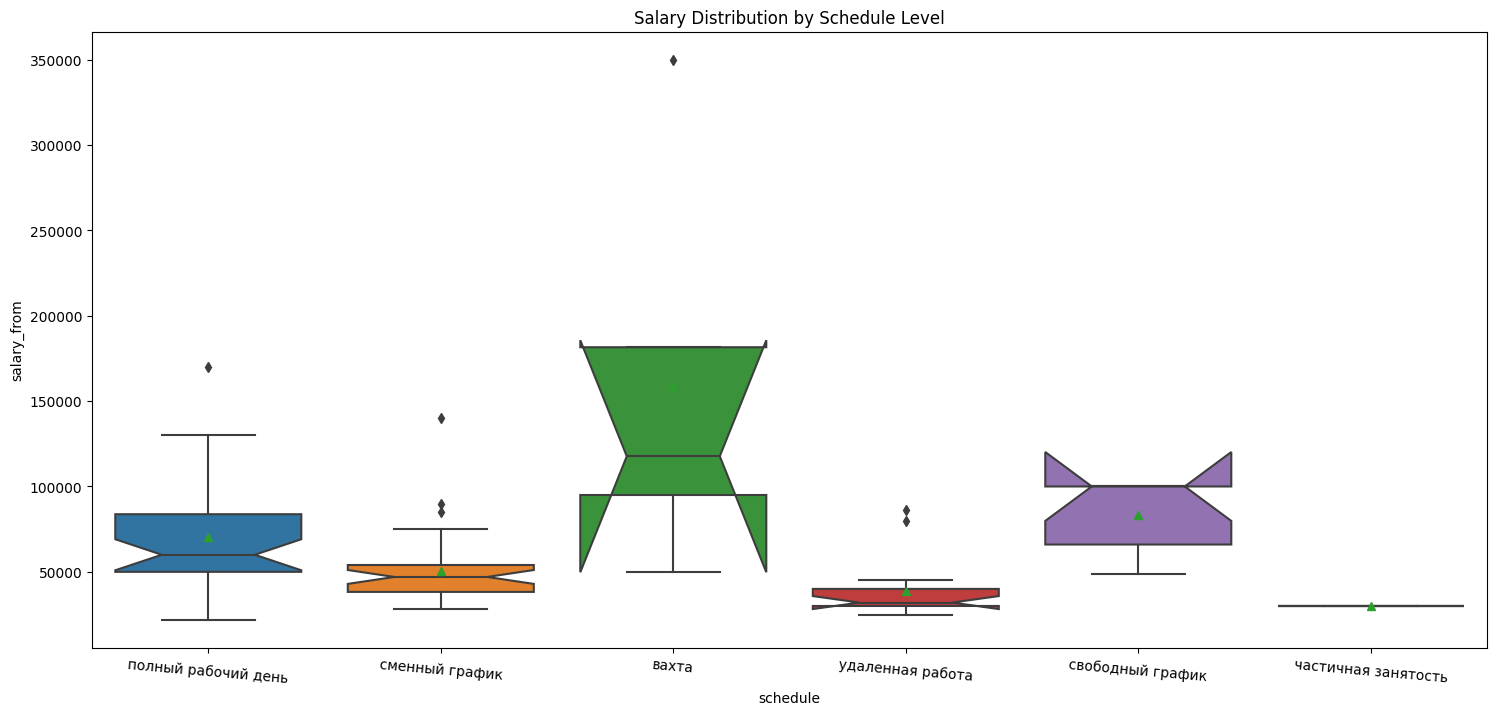

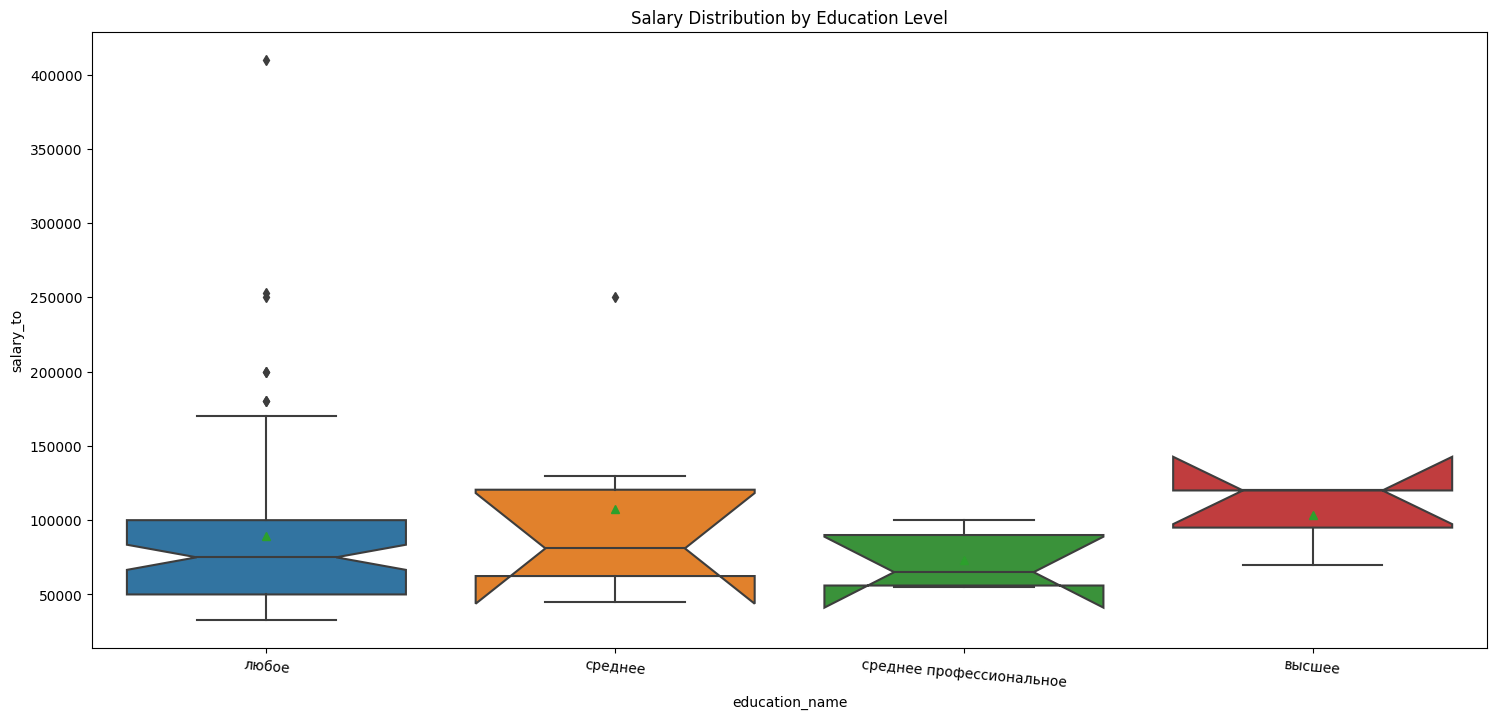

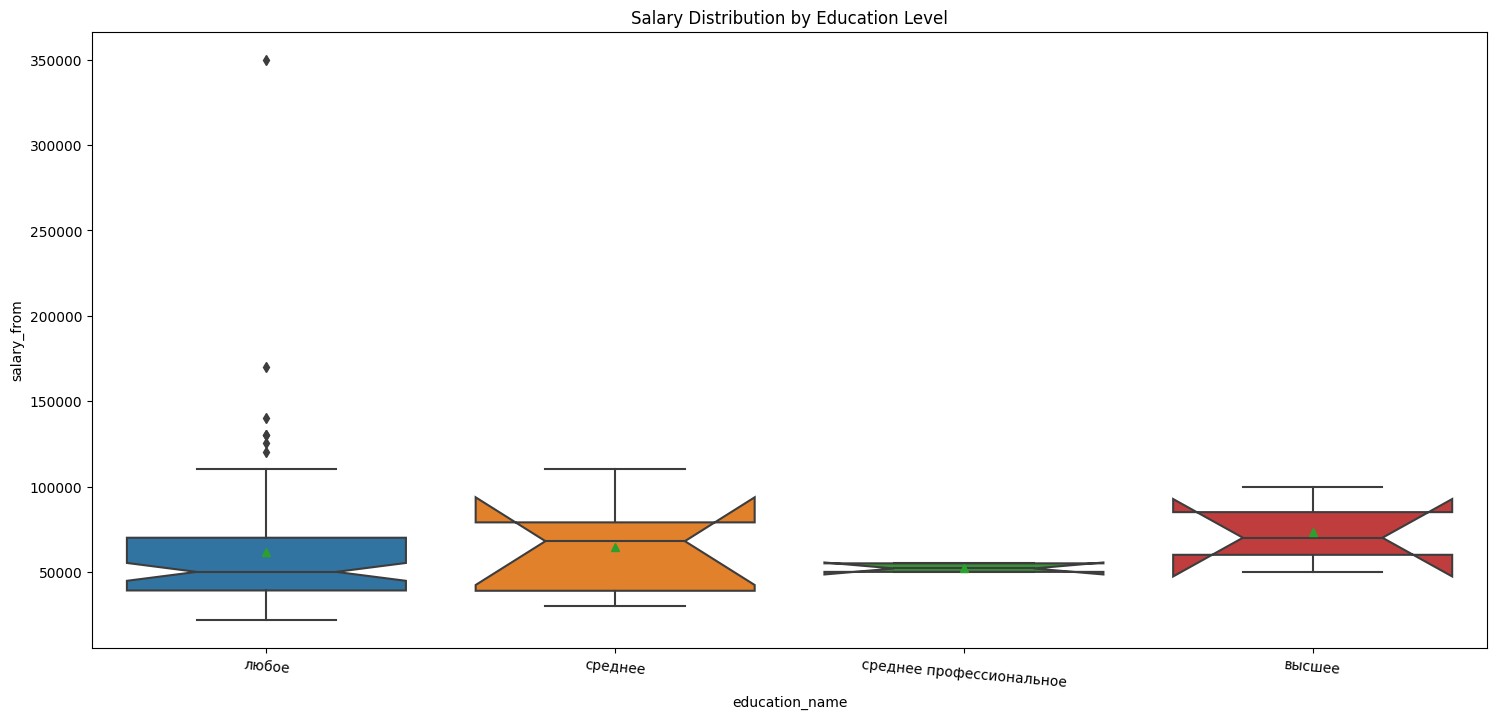

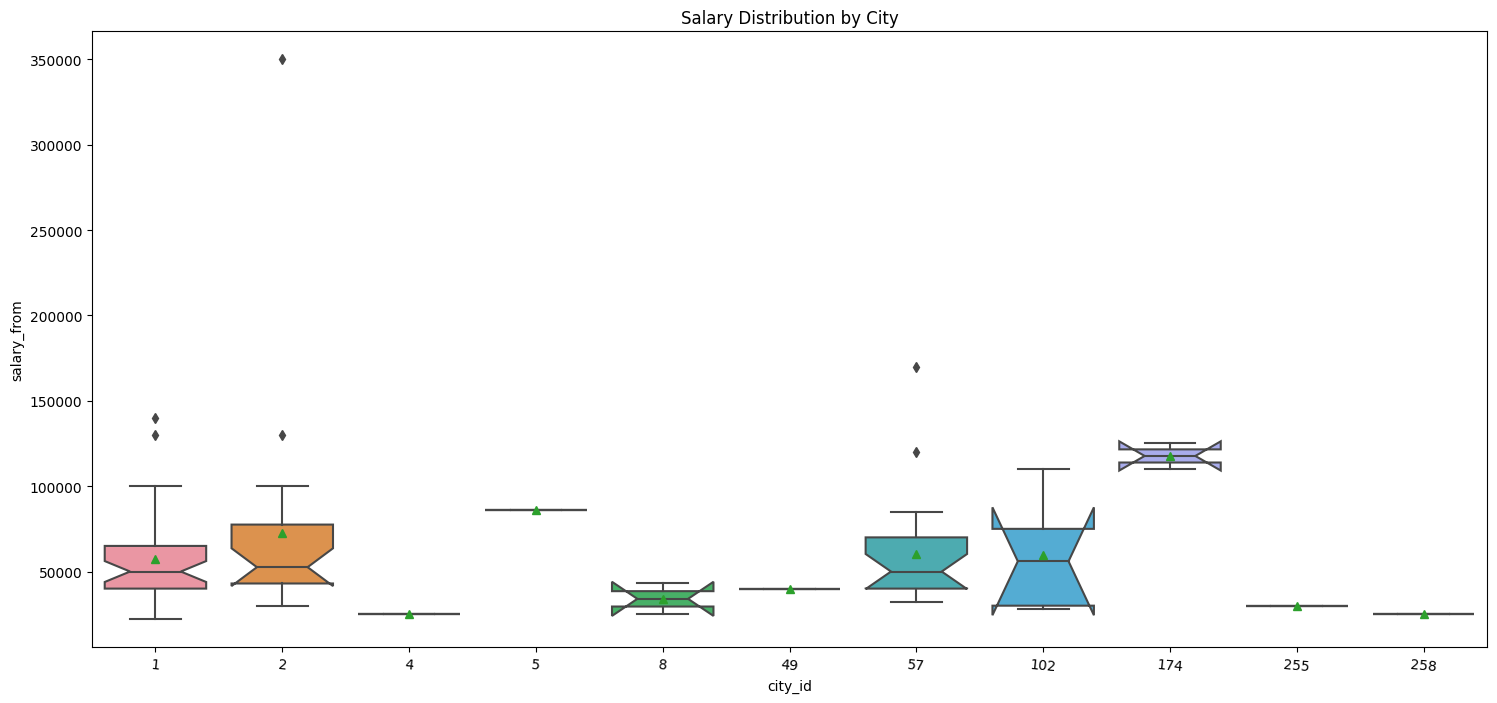

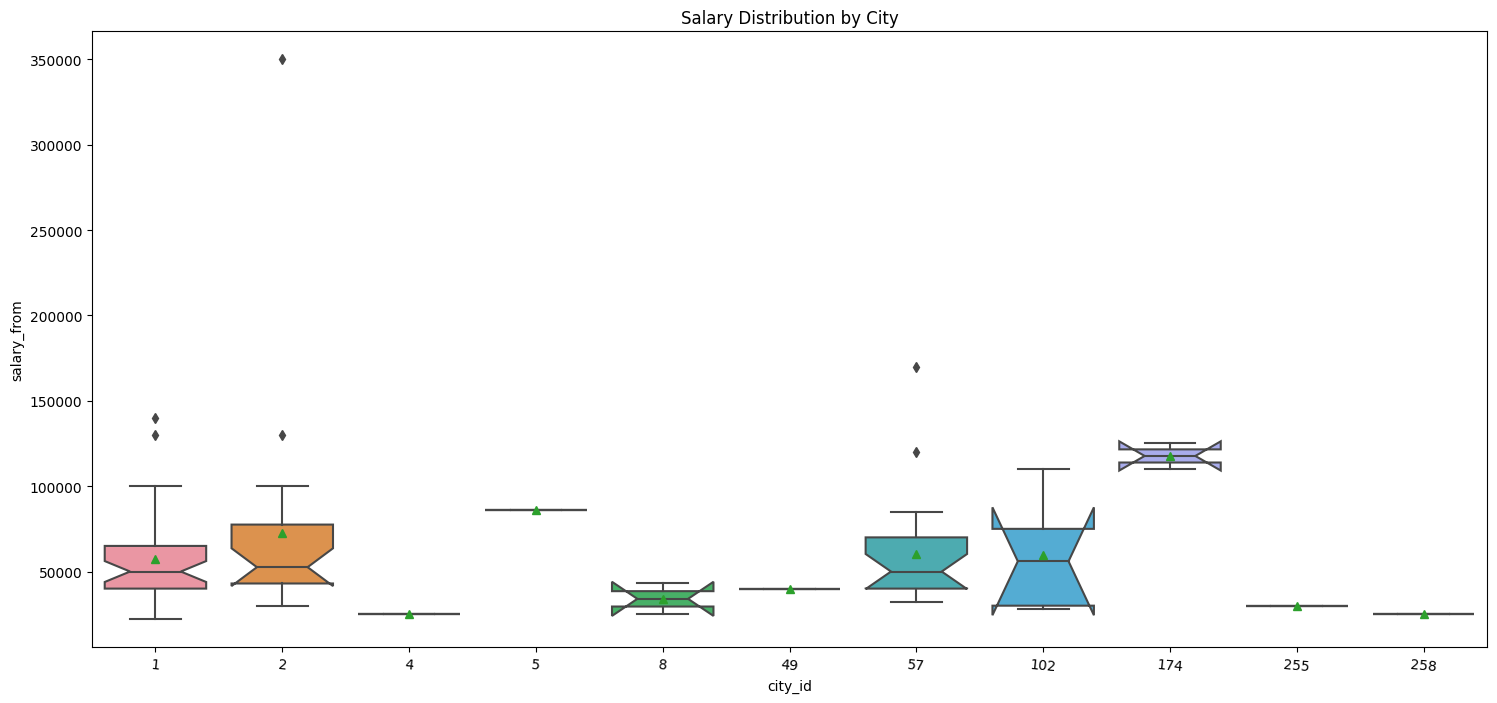

In [37]:
def create_boxplot(data, x_column, y_column, title, figsize=(18, 8)):
  """Creates a boxplot using Seaborn.

  Args:
    data: The data to use to create the boxplot.
    x_column: The name of the x-axis column.
    y_column: The name of the y-axis column.
    title: The title of the boxplot.
    figsize: The figure size of the plot.
  """

  plt.figure(figsize=figsize)
  sns.boxplot(
      x=x_column,
      y=y_column,
      showmeans=True,
      notch=True,
      whis=1.5,
      data=data,
  )
  plt.xticks(rotation=-5)
  plt.title(title)
  plt.show()


# Create the boxplots.
create_boxplot(sample_df, "schedule", "salary_to", "Salary Distribution by Schedule Level")
create_boxplot(sample_df, "schedule", "salary_from", "Salary Distribution by Schedule Level")
create_boxplot(sample_df, "education_name", "salary_to", "Salary Distribution by Education Level")
create_boxplot(sample_df, "education_name", "salary_from", "Salary Distribution by Education Level")
create_boxplot(sample_df, "city_id", "salary_from", "Salary Distribution by City")
create_boxplot(sample_df, "city_id", "salary_from", "Salary Distribution by City")

# **корреляционный анализ**

Анализ корреляций:

1. **id (Идентификатор)**
   - Корреляция с другими переменными в основном невысокая (близка к 0), что указывает на отсутствие явных линейных взаимосвязей.

2. **salary_from (Зарплата от) и salary_to (Зарплата до)**
   - Сильная положительная корреляция между `salary_from` и `salary_to` (0.761), что логично, так как обычно `salary_from` должна быть менее или равной `salary_to`.
   - Умеренная положительная корреляция между `salary_from` и `offer_education_id` (0.119) и `salary_to` и `offer_education_id` (0.086), что может указывать на связь между уровнем образования и зарплатой.

3. **offer_education_id (Идентификатор образования в предложении) и education_name (Название образования)**
   - Сильная положительная корреляция между `offer_education_id` и `education_name` (0.856), что логично, так как идентификатор образования и его название должны быть связаны.
   - Также умеренная положительная корреляция между `offer_education_id` и `education_order_num` (0.691).

4. **education_order_num (Порядковый номер образования)**
   - Сильная положительная корреляция между `education_order_num` и `education_name` (0.860), что может указывать на систематический порядок образования.

5. **city_id (Идентификатор города) и graphic (График)**
   - Низкая положительная корреляция между `city_id` и `graphic` (0.068), что может указывать на небольшую связь между городом и графиком работы.

6. **education_is_base (Базовое образование)**
   - Все значения NaN, поэтому не могут быть использованы для корреляционного анализа.

Общий вывод: Корреляционная матрица предоставляет информацию о степени взаимосвязи между переменными. Важно отметить, что корреляция не обязательно означает причинно-следственную связь, и дополнительный анализ и контекст необходимы для полного понимания данных.

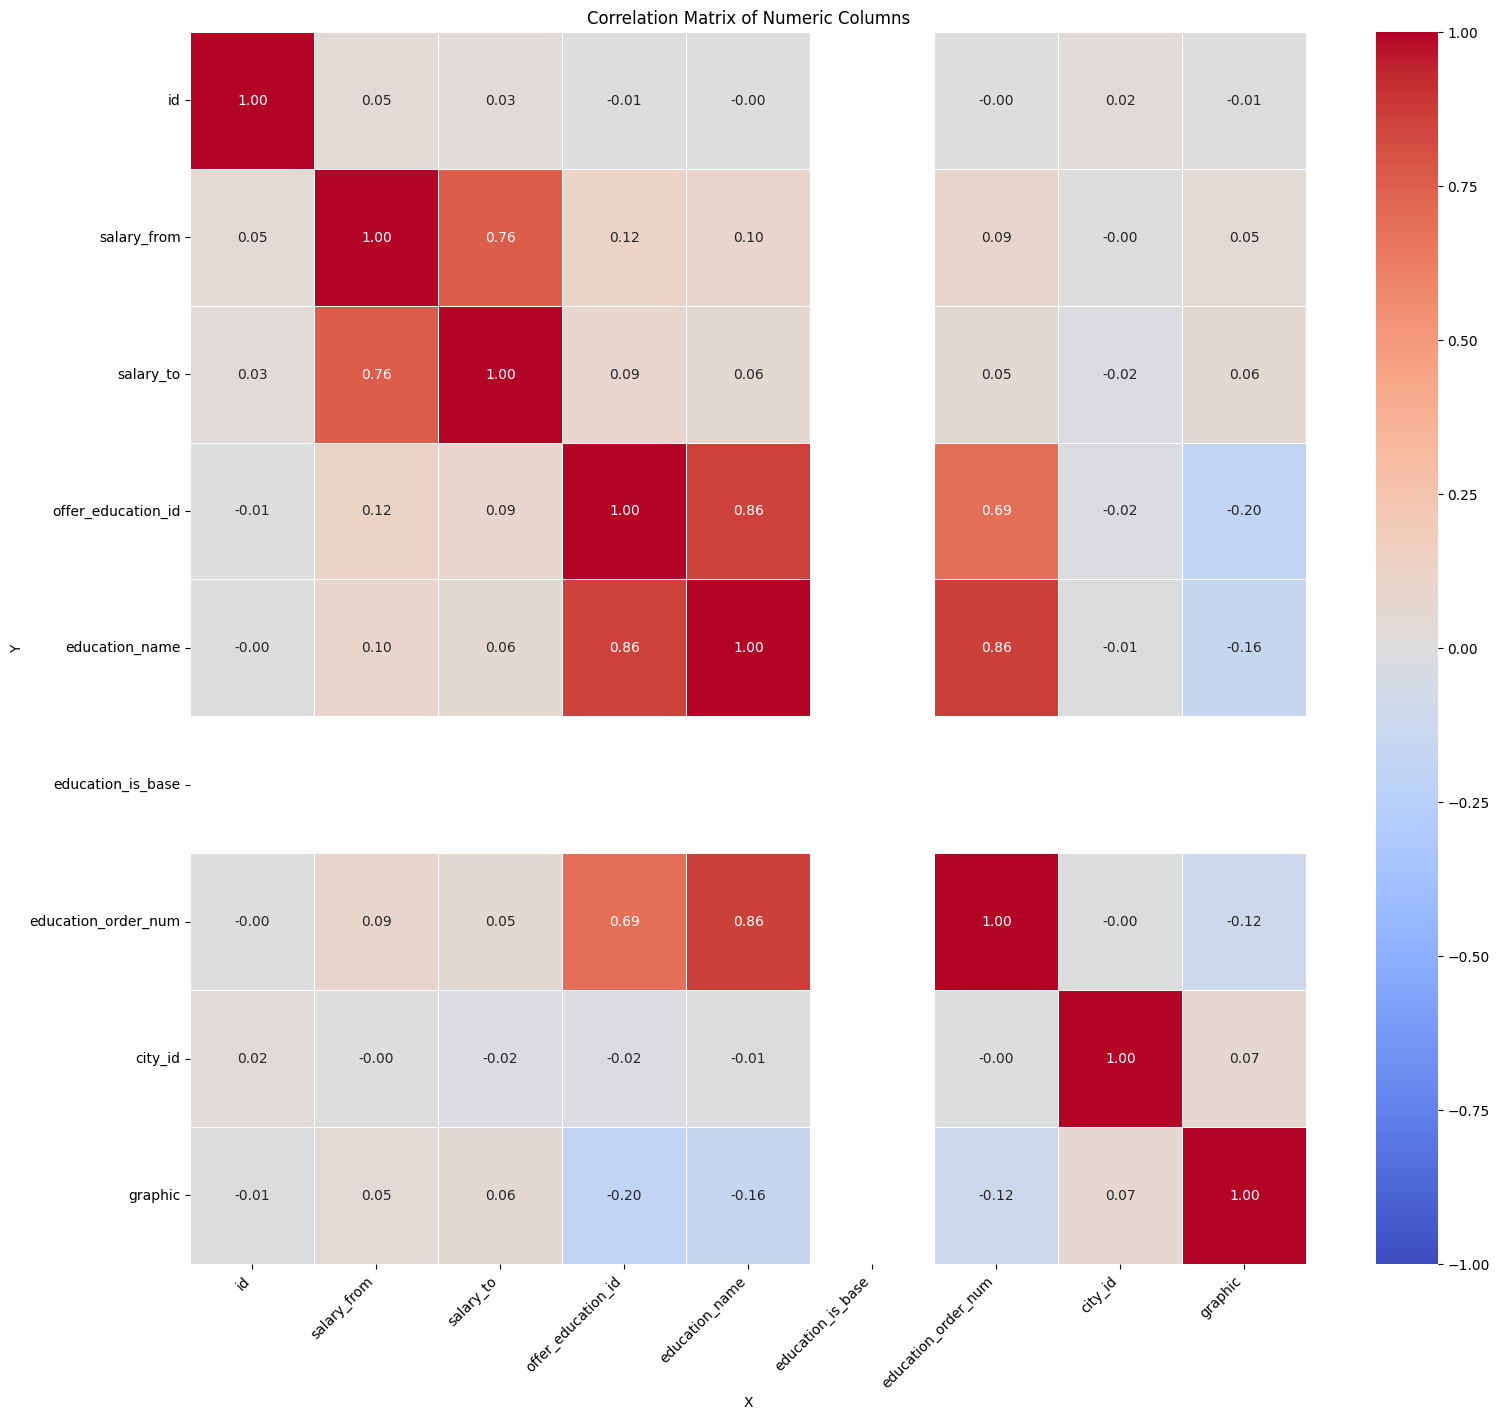

In [39]:
numeric_df = eda_data.select_dtypes(include=['int', 'float'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(18, 16))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    linewidths=0.5)

plt.title('Correlation Matrix of Numeric Columns')
plt.xlabel('X')
plt.ylabel('Y')

plt.xticks(rotation=45, ha='right')

plt.show()

- График показывает, что существует положительная корреляция между уровнем образования и заработной платой. Это означает, что люди с более высоким уровнем образования, скорее всего, будут зарабатывать больше. Однако корреляция не идеальна.

- Некоторые люди с более низким уровнем образования зарабатывают больше, чем люди с более высоким уровнем образования, но в целом люди с более высоким уровнем образования зарабатывают больше.

- Также стоит отметить, что распределение заработной платы для каждого уровня образования асимметрично вправо, что означает, что больше людей зарабатывают более низкую заработную плату, чем людей, зарабатывающих более высокую заработную плату.